## 머신러닝
# 커널 기법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### 테스트 데이터 만들기

In [6]:
from sklearn.datasets import make_circles

In [24]:
X, y = make_circles(100, noise=0.1, factor=0.6)

In [25]:
X.shape, y.shape

((100, 2), (100,))

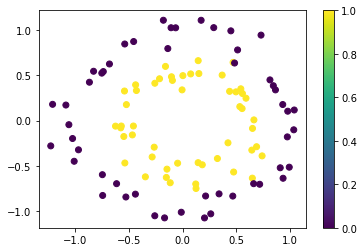

In [26]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

### 커널 기법
- 속성을 추가하는 것을 커널기법이라고 한다

In [28]:
X2 = np.c_[X, X**2]

In [29]:
X2.shape

(100, 4)

### 속성이 추가된 데이터를 분류

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(X2, y)
model.score(X2, y)

0.98

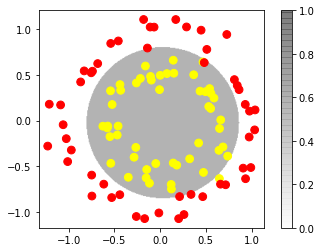

In [35]:
scale = 300
xmax = X[:,0].max()+.1
xmin = X[:,0].min()-.1
ymax = X[:,1].max()+.1
ymin = X[:,1].min()-.1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
X_grid = np.c_[X_grid, X_grid**2]

y_pred = model.predict(X_grid)

CS = plt.imshow(y_pred.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

# draw X_train
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap='autumn')
plt.colorbar(CS)